In [2]:
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt



In [7]:
hdul = fits.open('arcs.fits')

hdul.info()
print(hdul[0].header)
data_arcs=hdul[0].data.astype('float')

Filename: arcs.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     150   (2112, 325)   int16 (rescales to uint16)   
SIMPLE  =                    T / NORMAL FITS IMAGE                              BITPIX  =                   16 / DATA PRECISION                                 NAXIS   =                    2 / NUMBER OF IMAGE DIMENSIONS                     NAXIS1  =                 2112 / NUMBER OF COLUMNS                              NAXIS2  =                  325 / NUMBER OF ROWS                                 CRVAL1U =                    0 / COLUMN ORIGIN                                  CRVAL2U =                 1249 / ROW ORIGIN                                     CDELT1U =                    1 / COLUMN CHANGE PER PIXEL                        CDELT2U =                   -1 / ROW CHANGE PER PIXEL                           OBSNUM  =                 1014 / OBSERVATION NUMBER                             IDNUM   =                    3 /

In [9]:
arc_lamp_1d = np.zeros(2112)
for i in range(2112):
    arc_lamp_1d[i] = np.sum(data_arcs[:,i])

In [29]:
%matplotlib
plt.figure(figsize=(10,8))
plt.semilogy(arc_lamp_1d)
plt.xlabel("X Pixel",fontsize=20)
plt.ylabel("Counts", fontsize= 20)
plt.show()

Using matplotlib backend: MacOSX


In [63]:
## use the 600/4310 grism blue plot

wv_line = np.array([])
x_line = np.array([])
# Cd I  -- 3261.05
wv_line = np.append(wv_line,3261.05)
x_line = np.append(x_line,80.16)

#Hg I - 3650.15

wv_line = np.append(wv_line,3650.15)
x_line = np.append(x_line,518.06)

# Hg I - 4046.56

wv_line = np.append(wv_line,4046.56)
x_line = np.append(x_line,931.55)

# Hg I - 4358.33
wv_line = np.append(wv_line,4358.33)
x_line = np.append(x_line,1241.07)

wv_line = np.append(wv_line,4799.92)
x_line = np.append(x_line,1664.09)


wv_line = np.append(wv_line,5085.82)
x_line = np.append(x_line,1930.30)


Text(0, 0.5, 'Wavelength [Angstroms]')

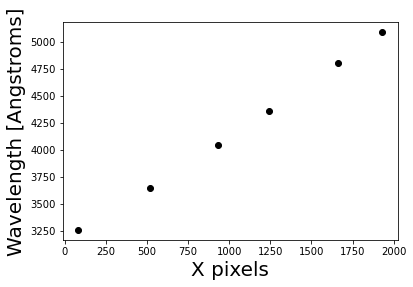

In [64]:
%matplotlib inline
plt.plot(x_line,wv_line,"ko")
plt.xlabel("X pixels",fontsize = 20)
plt.ylabel("Wavelength [Angstroms]",fontsize=20)

In [65]:
z = np.polyfit(x_line, wv_line, 3)

In [66]:
print(z)

[-1.26129763e-08  1.00794644e-04  8.32631452e-01  3.19362383e+03]


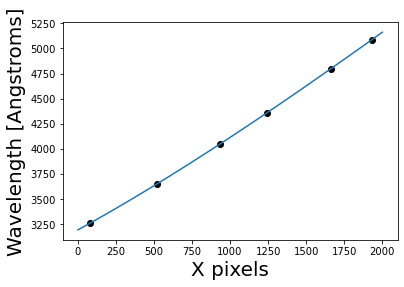

In [67]:
%matplotlib inline
plt.plot(x_line,wv_line,"ko")
plt.xlabel("X pixels",fontsize = 20)
plt.ylabel("Wavelength [Angstroms]",fontsize=20)
x=np.linspace(0,2000,2000)
#plt.plot(x,z[0]*x**2+z[1]*x+z[2])
#plt.plot(x,z[0]*x+z[1])
plt.plot(x,z[0]*x**3+z[1]*x**2+z[2]*x+z[3])

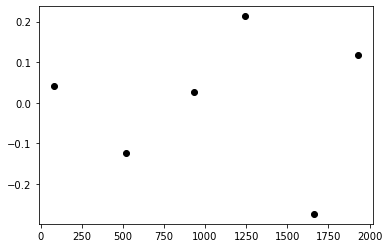

In [68]:
%matplotlib inline
plt.plot(x_line,wv_line-(z[0]*x_line**3+z[1]*x_line**2+z[2]*x_line+z[3]),"ko")
#plt.plot(x_line,wv_line-(z[0]*x_line+z[1]),"ko")
#plt.xlabel("X pixels",fontsize = 20)
#plt.ylabel("Wavelength [Angstroms]",fontsize=20)
#x=np.linspace(0,2000,2000)
#plt.plot(x,z[0]*x**2+z[1]*x+z[2])

In [69]:
hdul = fits.open('solar_spectrum.fits')

hdul.info()
print(hdul[0].header)
data_solar=hdul[0].data.astype('float')

Filename: solar_spectrum.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     150   (2112, 325)   int16 (rescales to uint16)   
SIMPLE  =                    T / NORMAL FITS IMAGE                              BITPIX  =                   16 / DATA PRECISION                                 NAXIS   =                    2 / NUMBER OF IMAGE DIMENSIONS                     NAXIS1  =                 2112 / NUMBER OF COLUMNS                              NAXIS2  =                  325 / NUMBER OF ROWS                                 CRVAL1U =                    0 / COLUMN ORIGIN                                  CRVAL2U =                 1249 / ROW ORIGIN                                     CDELT1U =                    1 / COLUMN CHANGE PER PIXEL                        CDELT2U =                   -1 / ROW CHANGE PER PIXEL                           OBSNUM  =                 1029 / OBSERVATION NUMBER                             IDNUM   =             

In [70]:
solar_1d = np.zeros(2112)
for i in range(2112):
    solar_1d[i] = np.sum(data_solar[:,i])

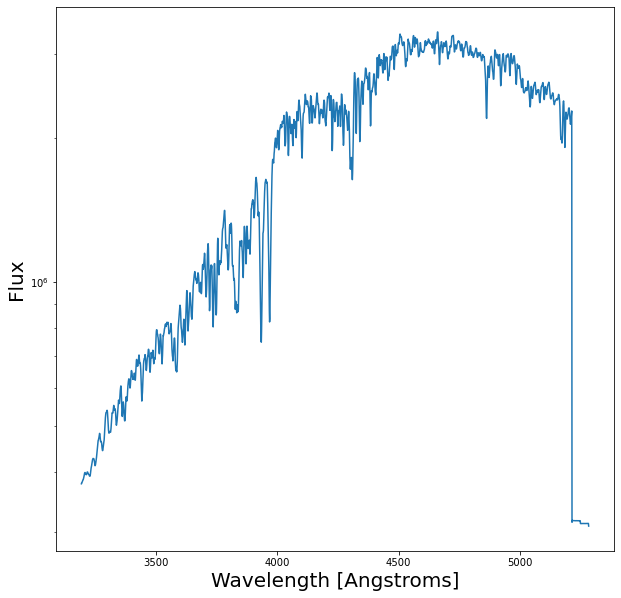

In [73]:
%matplotlib inline
plt.figure(figsize=(10,10))
#plt.plot(x_line,wv_line,"ko")
plt.xlabel("Wavelength [Angstroms]",fontsize = 20)
plt.ylabel("Flux",fontsize=20)
x=np.linspace(0,2112,2112)
wv = z[0]*x**3+z[1]*x**2+z[2]*x +z[3]

plt.semilogy(wv,solar_1d)

In [74]:
# try seeing solar lines

%matplotlib 
plt.figure(figsize=(10,10))
plt.xlim(3900,4050)
#plt.plot(x_line,wv_line,"ko")
plt.xlabel("Wavelength [Angstroms]",fontsize = 20)
plt.ylabel("Flux",fontsize=20)
x=np.linspace(0,2112,2112)
wv = z[0]*x**3+z[1]*x**2+z[2]*x +z[3]

plt.semilogy(wv,solar_1d)

Using matplotlib backend: MacOSX
